# The Street View House Numbers (SVHN) Project
Data set used : https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view from Great Lakes 
submitted by : Shashidhar.B

## Introduction
In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

## Objectives

1)Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

2)Data fetching and understand the train/val/test splits.

3)Implement and apply an optimal k-Nearest Neighbor (kNN) classifier.

4)Print the classification metric report.

5)Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations)

6)Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

7)Implement batch normalization for training the neural network 

8)Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics

### Importing Necessary Packages

In [1]:
#For Numerial Operations numpy(Numerical Python) is used
import numpy as np

#For Data Analysis pandas(Python Data Analysis Library) is used
import pandas as pd

#For 2D graphs ploting matplotlib library is used
import matplotlib.pyplot as plt
#To enable matplotlib to plot in Jupyter Notebook
%matplotlib inline

#For better visualisation of Statistical Data seaborn library is used
import seaborn as sns

In [2]:
#To Split Train/Test data
from sklearn.model_selection import train_test_split

In [3]:
# calculate accuracy measures and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve

In [5]:
#The h5py package is a Pythonic interface to the HDF5 binary data format
import h5py

# to create large-scale neural networks with many layers
import tensorflow as tf

#to enable fast experimentation with deep neural networks
import keras
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

ModuleNotFoundError: No module named 'keras'

In [ ]:
#To ignore warnings for exceptional handling
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To handle higher workload 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
h5FilePath ="SHASHI\Downloads\Neural Networks\project/SVHN_single_grey1.h5"

### Reading the dataset

In [5]:
#Read SVHN data from h5 file
svhn_h5f = h5py.File(h5FilePath,"r")

NameError: name 'h5FilePath' is not defined

In [50]:
#Get Keys from h5py object
keys=svhn_h5f.keys()
for key in keys:
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
#Get Train, Test and Validation data along with Label
X_train=svhn_h5f['X_train'][:]
y_train=svhn_h5f['y_train'][:]

X_test=svhn_h5f['X_test'][:]
y_test=svhn_h5f['y_test'][:]

X_val=svhn_h5f['X_val'][:]
y_val=svhn_h5f['y_val'][:]

In [56]:
#Get Train Y label unique value
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [57]:
#Get Test Y label unique value
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [58]:
#Get Test Y label unique value
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#Close h5 file
svhn_h5f.close()

In [54]:
print("Training Set",X_train.shape, y_train.shape )
print("Validation Set",X_val.shape, y_val.shape )
print("Test Set",X_test.shape, y_test.shape )

Training Set (42000, 32, 32) (42000,)
Validation Set (60000, 32, 32) (60000,)
Test Set (18000, 32, 32) (18000,)


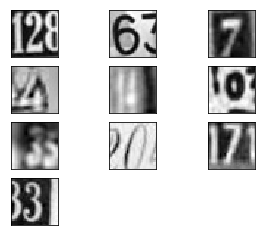

label for each of the above image:
 [2, 6, 7, 4, 4, 0, 3, 0, 7, 3]


In [55]:
# Visualize first 10 train data with label
labels = []

plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    lbl=y_train[i]
    labels.append(lbl)
plt.show()
print("label for each of the above image:\n", labels)

In [0]:
#Check Missing value if any
bank_df.isnull().values.any()

False

### Converting train, test and validation data labels to vectors by one hot coading

In [0]:
num_classes = 10 # No. of unique Label in the dataset (From 1 to 10)
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [61]:
print(y_train.shape)
print('First 5 examples now are: \n', y_train[0:5])

(42000, 10)
First 5 examples now are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Normalizing the Train, Test and Validation image data from 0-255 to 0-1

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

### Reshaping the data from 32x32 to 32x32x1 to match input dimensions in Conv2D layer in keras

In [0]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
X_val = X_val.reshape((X_val.shape[0], 32, 32, 1))

In [64]:
print("Training Set",X_train.shape )
print("Validation Set",X_val.shape )
print("Test Set",X_test.shape )

Training Set (42000, 32, 32, 1)
Validation Set (60000, 32, 32, 1)
Test Set (18000, 32, 32, 1)


### Building the Model

In [0]:
#Initialize model1
model1 = tf.keras.models.Sequential()

In [0]:
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 1)))
model1.add(tf.keras.layers.Flatten())
#Add - Dense Layer - 128 Nurons with Relu
model1.add(tf.keras.layers.Dense(128, activation='relu'))
#Add - Dense Layer/output layer - 10 Nurons with Softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# compile model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
# Fit the model1 with 10 epochs and batch size 32 for train and validation data
m1_history=model1.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 2.2521 - acc: 0.1830 - val_loss: 2.0587 - val_acc: 0.3280
Epoch 2/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.5868 - acc: 0.5025 - val_loss: 1.3540 - val_acc: 0.5812
Epoch 3/10
42000/42000 [==============================] - 65s 2ms/sample - loss: 1.1759 - acc: 0.6402 - val_loss: 1.1430 - val_acc: 0.6375
Epoch 4/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.0528 - acc: 0.6803 - val_loss: 1.0562 - val_acc: 0.6773
Epoch 5/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.9678 - acc: 0.7069 - val_loss: 0.9986 - val_acc: 0.6922
Epoch 6/10
42000/42000 [==============================] - 65s 2ms/sample - loss: 0.9078 - acc: 0.7246 - val_loss: 0.9806 - val_acc: 0.7042
Epoch 7/10
42000/42000 [==============================] - 67s 2ms/sample - loss: 0.8518 - acc: 0.7441 - val_loss: 0.

In [77]:
# list all data in history
print(m1_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### Plot Model1 Fit output for Train & Validation Data

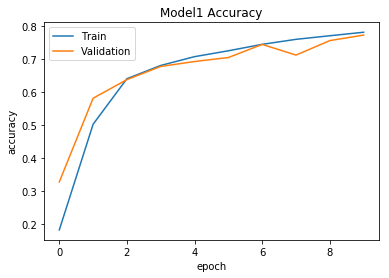

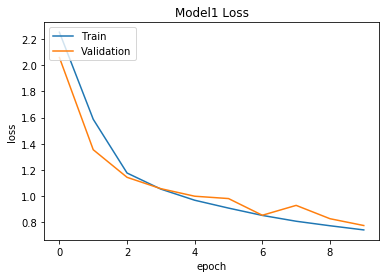

In [80]:

# summarize history for accuracy
plt.plot(m1_history.history['acc'])
plt.plot(m1_history.history['val_acc'])
plt.title('Model1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(m1_history.history['loss'])
plt.plot(m1_history.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Evaluate Model1 with Test Data:

In [82]:
model1_result=model1.evaluate(X_test,y_test,verbose=1)

18000/18000 [==============================] - 5s 284us/sample - loss: 0.8375 - acc: 0.7576


In [83]:
print("Model1 Accuracy : {0}".format(model1_result[1]*100))

Model Accuracy : 75.75555443763733


In [85]:
print("Model1 Loss : {0}".format(model1_result[0]*100))

Model1 Loss : 83.75326020452711


### Model1 Summary:

In [81]:
### Model Summary:

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,688,138
Trainable params: 3,688,138
Non-trainable params: 0
_________________________________________________________________
